Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [2]:
import pandas as pd
import numpy as np


In [4]:
boston = pd.read_csv("HousingData.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
correlation_matrix = boston.corr()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


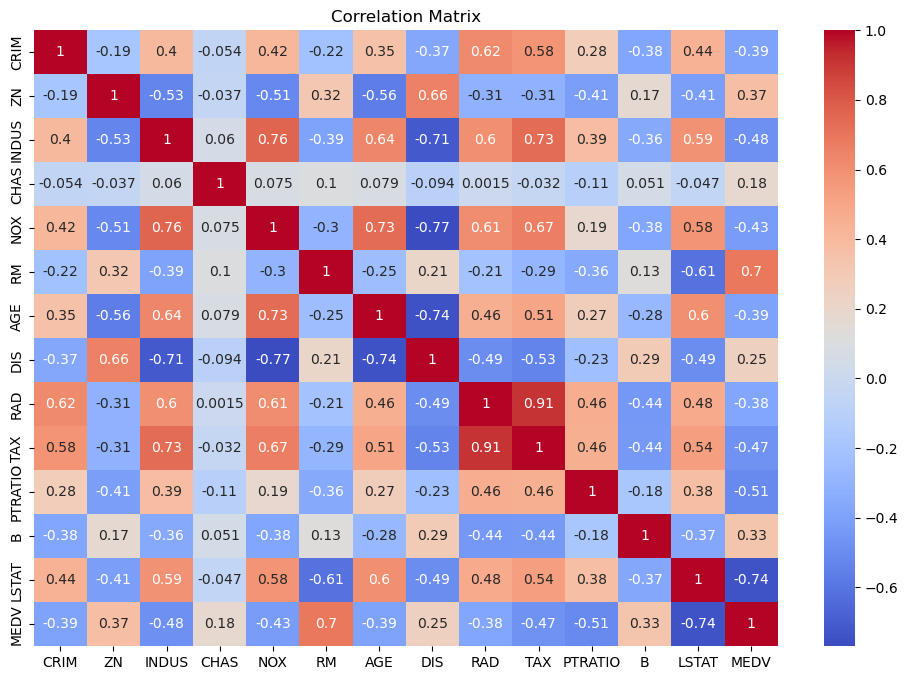

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
threshold = 0.8
high_corr_features = np.where(np.abs(correlation_matrix.values[:-1,:-1])>= threshold)
features_to_remove = set()
for i,j in zip(*high_corr_features):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        # Remove that feature whis has low correlation with target column
                    features_to_remove.add(j if np.abs(correlation_matrix['MEDV']).iloc[i] > np.abs(correlation_matrix['MEDV']).iloc[j] else i)


df_filtered_corr = boston.drop(boston.columns[list(features_to_remove)], axis=1)

In [13]:
df_filtered_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


# CALCULATE THE VIF FOR EACH FEATURE

In [19]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor

X = boston.drop('MEDV',axis=1)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"]  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

MissingDataError: exog contains inf or nans

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Extract the independent variables (features) and target variable
X = boston.drop('MEDV', axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

MissingDataError: exog contains inf or nans

In [22]:
 #Set the threshold for VIF
vif_threshold = 5

# Identify features with high VIF values
high_vif_features = vif[vif['VIF'] > vif_threshold]['Feature'].values

# Remove features with high VIF values from the dataset
df_filtered_vif = boston.drop(high_vif_features, axis=1)

df_filtered_vif

KeyError: 'VIF'

In [25]:
# Extract the independent variables (features) and target variable
X = boston.drop('MEDV', axis=1)

# Calculate the condition number
condition_number = np.linalg.cond(X)
condition_number

nan

In [26]:
def remove_features_condition_number(X, threshold):
    condition_number = np.linalg.cond(X)
    if condition_number < threshold:
        return X
    
    n_features = X.shape[1]
    for i in range(n_features):
        X_temp = X.drop(X.columns[i], axis=1)
        condition_number_temp = np.linalg.cond(X_temp)
        if condition_number_temp < threshold:
            return remove_features_condition_number(X_temp, threshold)
    
    # If no subset of features satisfies the condition number threshold,
    # return the original features
    return X

# Set the threshold for condition number
condition_number_threshold = 30

In [28]:

# Remove features until the condition number falls below the threshold
df_filtered_condition_number = remove_features_condition_number(X, condition_number_threshold)
df_filtered_condition_number

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [29]:
# Calculate the condition number
condition_number = np.linalg.cond(df_filtered_condition_number)
condition_number

nan

In [30]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(boston.drop('MEDV', axis=1))


# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(boston['MEDV'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())


MissingDataError: exog contains inf or nans

In [31]:
# Data after filtering from corr approach -> corr approach drop tax column

data_with_corr_reduced = sm.add_constant(df_filtered_corr.drop('MEDV', axis=1))

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(boston['MEDV'], data_with_corr_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())

MissingDataError: exog contains inf or nans

In [32]:
# Data after filtering from corr approach

data_with_vif_reduced = sm.add_constant(df_filtered_vif)

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(boston['MEDV'], data_with_vif_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())

NameError: name 'df_filtered_vif' is not defined